In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Script di bawah berfungsi untuk membaca dan menampilkan gambar. plt.imread("Assets/aktivis.jpg") digunakan untuk membaca file gambar bernama "aktivis.jpg" yang berada di dalam folder "Assets", lalu hasil bacaan tersebut disimpan ke dalam variabel img dalam bentuk array numerik. Setelah itu, plt.imshow(img) digunakan untuk menampilkan gambar tersebut ke dalam jendela plotting menggunakan matplotlib, dan plt.show() dipanggil untuk memunculkan jendela plot sehingga gambar dapat dilihat secara visual. Secara keseluruhan, kode ini bertujuan untuk membaca sebuah gambar dari direktori tertentu dan langsung menampilkannya.

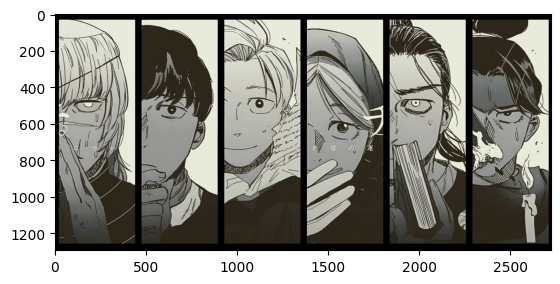

In [3]:
img = plt.imread("Assets/aktivis.jpg")

plt.imshow(img)
plt.show()

Script di bawah berfungsi untuk memotong gambar menjadi enam bagian secara horizontal dan menampilkannya satu per satu. Pada bagian awal, gambar img dipotong menjadi enam bagian (aktivis1 hingga aktivis6) dengan mengambil irisan kolom tertentu: setiap bagian selebar 450 piksel. Misalnya, aktivis1 = img[:, 0:450] mengambil kolom dari 0 hingga 449, aktivis2 = img[:, 450:900] mengambil kolom dari 450 hingga 899, dan seterusnya. Setelah dipotong, setiap potongan ditampilkan dalam satu baris dengan enam kolom menggunakan plt.subplot(1,6,i), di mana i adalah nomor subplotnya. Fungsi plt.axis(False) digunakan untuk menghilangkan sumbu agar fokus hanya pada gambar, dan plt.show() akhirnya dipanggil untuk menampilkan semua gambar hasil pemotongan dalam satu baris.

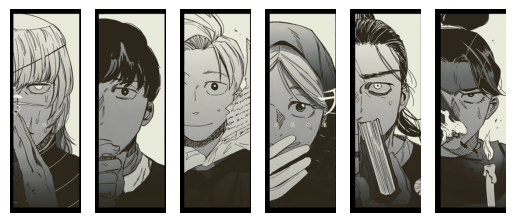

In [4]:
aktivis1 = img[:, 0: 450]
aktivis2 = img[:, 450: 900]
aktivis3 = img[:, 900: 1350]
aktivis4 = img[:, 1350: 1800]
aktivis5 = img[:, 1800: 2250]
aktivis6 = img[:, 2250: 2700]

plt.subplot(1,6,1)
plt.imshow(aktivis1)
plt.axis(False)
plt.subplot(1,6,2)
plt.imshow(aktivis2)
plt.axis(False)
plt.subplot(1,6,3)
plt.imshow(aktivis3)
plt.axis(False)
plt.subplot(1,6,4)
plt.imshow(aktivis4)
plt.axis(False)
plt.subplot(1,6,5)
plt.imshow(aktivis5)
plt.axis(False)
plt.subplot(1,6,6)
plt.imshow(aktivis6)
plt.axis(False)

plt.show()

Script di bawah berfungsi untuk menggabungkan enam potongan gambar (aktivis2, aktivis6, aktivis4, aktivis1, aktivis5, dan aktivis3) secara horizontal menggunakan fungsi cv.hconcat dari OpenCV, sehingga menghasilkan satu gambar panjang yang disebut img_timelane. Urutan potongan gambar yang digabungkan tidak mengikuti urutan awal, melainkan diacak sesuai urutan di dalam daftar [aktivis2, aktivis6, aktivis4, aktivis1, aktivis5, aktivis3]. Setelah gambar digabung, plt.imshow(img_timelane) digunakan untuk menampilkan gambar hasil gabungan, plt.axis(False) menghilangkan tampilan sumbu koordinat agar gambar terlihat bersih, lalu plt.show() dipanggil untuk memunculkan hasil visualisasinya.

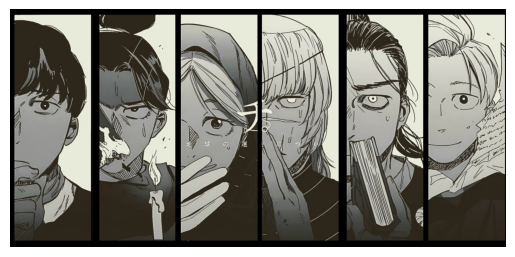

In [5]:
img_timelane = cv.hconcat([aktivis2, aktivis6, aktivis4, aktivis1, aktivis5, aktivis3])

plt.imshow(img_timelane)
plt.axis(False)
plt.show()

Script di bawah bertujuan untuk mengubah gambar hasil gabungan (img_timelane) menjadi citra grayscale, lalu menerapkan ekualisasi histogram untuk meningkatkan kontras citra tersebut. Pertama, gambar img_timelane dikonversi dari format warna RGB ke BGR menggunakan cv.cvtColor(img_timelane, cv.COLOR_RGB2BGR), lalu dari BGR ke grayscale menjadi img_timelane_gray. Setelah itu, fungsi cv.equalizeHist digunakan untuk membuat img_timelane_eq_gray, yaitu citra hasil ekualisasi histogram dari img_timelane_gray. Dengan plt.figure(figsize=(12,6)), dibuat kanvas plotting berukuran besar, lalu dengan plt.subplot(1,2,1) dan plt.subplot(1,2,2) ditampilkan dua gambar berdampingan: gambar grayscale sebelum ekualisasi di sebelah kiri, dan gambar grayscale setelah ekualisasi di sebelah kanan. Fungsi plt.axis('off') menyembunyikan sumbu dan plt.title() memberikan judul pada masing-masing gambar, sebelum akhirnya ditampilkan menggunakan plt.show().

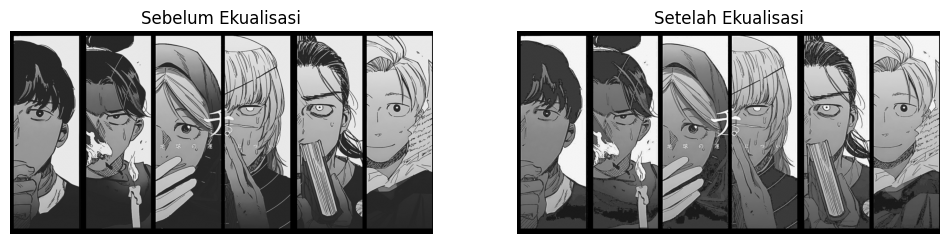

In [ ]:
img_timelane_bgr = cv.cvtColor(img_timelane, cv.COLOR_RGB2BGR)
img_timelane_gray = cv.cvtColor(img_timelane_bgr, cv.COLOR_BGR2GRAY)
img_timelane_eq_gray = cv.equalizeHist(img_timelane_gray)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_timelane_gray, cmap='gray')
plt.axis('off')
plt.title('Sebelum Ekualisasi')

plt.subplot(1,2,2)
plt.imshow(img_timelane_eq_gray, cmap='gray')
plt.axis('off')
plt.title('Setelah Ekualisasi')

plt.show()


Script di bawah digunakan untuk membandingkan histogram intensitas pixel dari gambar sebelum dan sesudah proses ekualisasi histogram. Pertama, hist_before dihitung menggunakan cv.calcHist, yang menghasilkan distribusi frekuensi pixel dari citra grayscale asli img_timelane_gray, sementara hist_after menghitung histogram dari citra img_timelane_eq_gray yang sudah diekualisasi. bins = np.arange(256) membuat array dari 0 hingga 255 yang mewakili semua kemungkinan nilai intensitas pixel. Dengan plt.figure(figsize=(14,6)), disiapkan kanvas plotting lebar, lalu plt.subplot(1,2,1) digunakan untuk menggambar histogram sebelum ekualisasi dalam bentuk grafik batang biru, dan plt.subplot(1,2,2) menggambar histogram sesudah ekualisasi dalam grafik batang hijau. Fungsi plt.tight_layout() memastikan kedua subplot tidak bertumpukan, dan plt.show() menampilkan keduanya berdampingan untuk analisis visual.

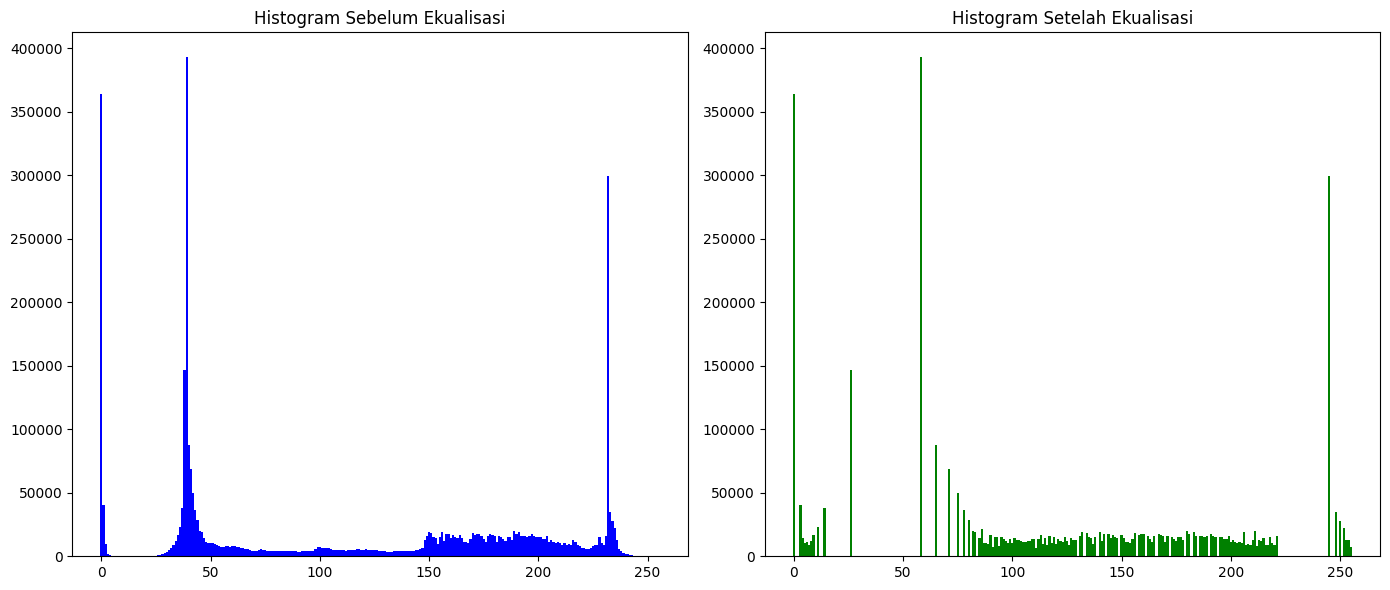

In [27]:
hist_before = cv.calcHist([img_timelane_gray], [0], None, [256], [0, 256])
hist_after = cv.calcHist([img_timelane_eq_gray], [0], None, [256], [0, 256])

bins = np.arange(256)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.bar(bins, hist_before.flatten(), color='blue', width=1.0)
plt.title('Histogram Sebelum Ekualisasi')

plt.subplot(1,2,2)
plt.bar(bins, hist_after.flatten(), color='green', width=1.0)
plt.title('Histogram Setelah Ekualisasi')

plt.tight_layout()
plt.show()

Script di bawah bertujuan untuk mempersiapkan gambar dan mendefinisikan fungsi untuk melakukan histogram matching antara gambar-gambar grayscale. Pertama, gambar propaganda dan draka dibaca dari file menggunakan plt.imread() lalu dikonversi ke tipe data uint8 agar sesuai untuk pengolahan citra. Gambar img_timelane yang sudah digabung sebelumnya juga diubah menjadi grayscale (img_timelane_gray), begitu juga gambar propaganda_gray dan draka_gray agar semua berada dalam skala intensitas yang sama. Kemudian fungsi match_histogram_gray didefinisikan, dengan tujuan menyamakan distribusi histogram dari gambar source terhadap gambar template. Fungsi ini bekerja dengan meratakan gambar menjadi vektor satu dimensi (ravel), menghitung nilai unik dan jumlah kemunculannya (np.unique), lalu membentuk cumulative distribution function (CDF) dari source dan template. Dengan menggunakan np.interp, nilai intensitas source dipetakan ke intensitas template berdasarkan kemiripan CDF, dan akhirnya hasilnya dikembalikan ke bentuk aslinya (reshape(oldshape)) dalam format uint8. Proses ini penting untuk menyesuaikan pencahayaan atau tone gambar sehingga gambar source tampak "meniru" karakteristik pencahayaan template.

In [ ]:
propaganda = plt.imread('Assets/propaganda.jpg').astype(np.uint8)
draka = plt.imread('Assets/draka.jpg').astype(np.uint8)

img_timelane_gray = cv.cvtColor(img_timelane, cv.COLOR_RGB2GRAY)
propaganda_gray = cv.cvtColor(propaganda, cv.COLOR_RGB2GRAY)
draka_gray = cv.cvtColor(draka, cv.COLOR_RGB2GRAY)

def match_histogram_gray(source, template):
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]

    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape).astype(np.uint8)

Script di bawah bertujuan untuk menyesuaikan distribusi intensitas gambar img_timelane_gray agar menyerupai dua gambar referensi, yaitu propaganda_gray dan draka_gray, lalu menampilkan hasilnya dalam satu tampilan. Pertama, histogram img_timelane_gray dicocokkan dengan propaganda_gray dan draka_gray menggunakan fungsi match_histogram_gray, menghasilkan img_spec_propaganda dan img_spec_draka. Semua gambar yang akan ditampilkan kemudian diubah ukurannya menjadi 500x300 piksel agar seragam dengan fungsi cv.resize. Setelah itu, plt.subplots digunakan untuk membuat layout 2 baris 3 kolom: baris pertama menampilkan gambar asli propaganda, img_timelane, dan draka dalam warna penuh, sedangkan baris kedua menampilkan hasil histogram matching, yaitu img_spec_propaganda_resized dan img_spec_draka_resized dalam mode grayscale, dengan kolom tengah dibiarkan kosong. Dengan plt.tight_layout(), jarak antar gambar diatur agar rapi dan tidak tumpang tindih saat ditampilkan menggunakan plt.show().

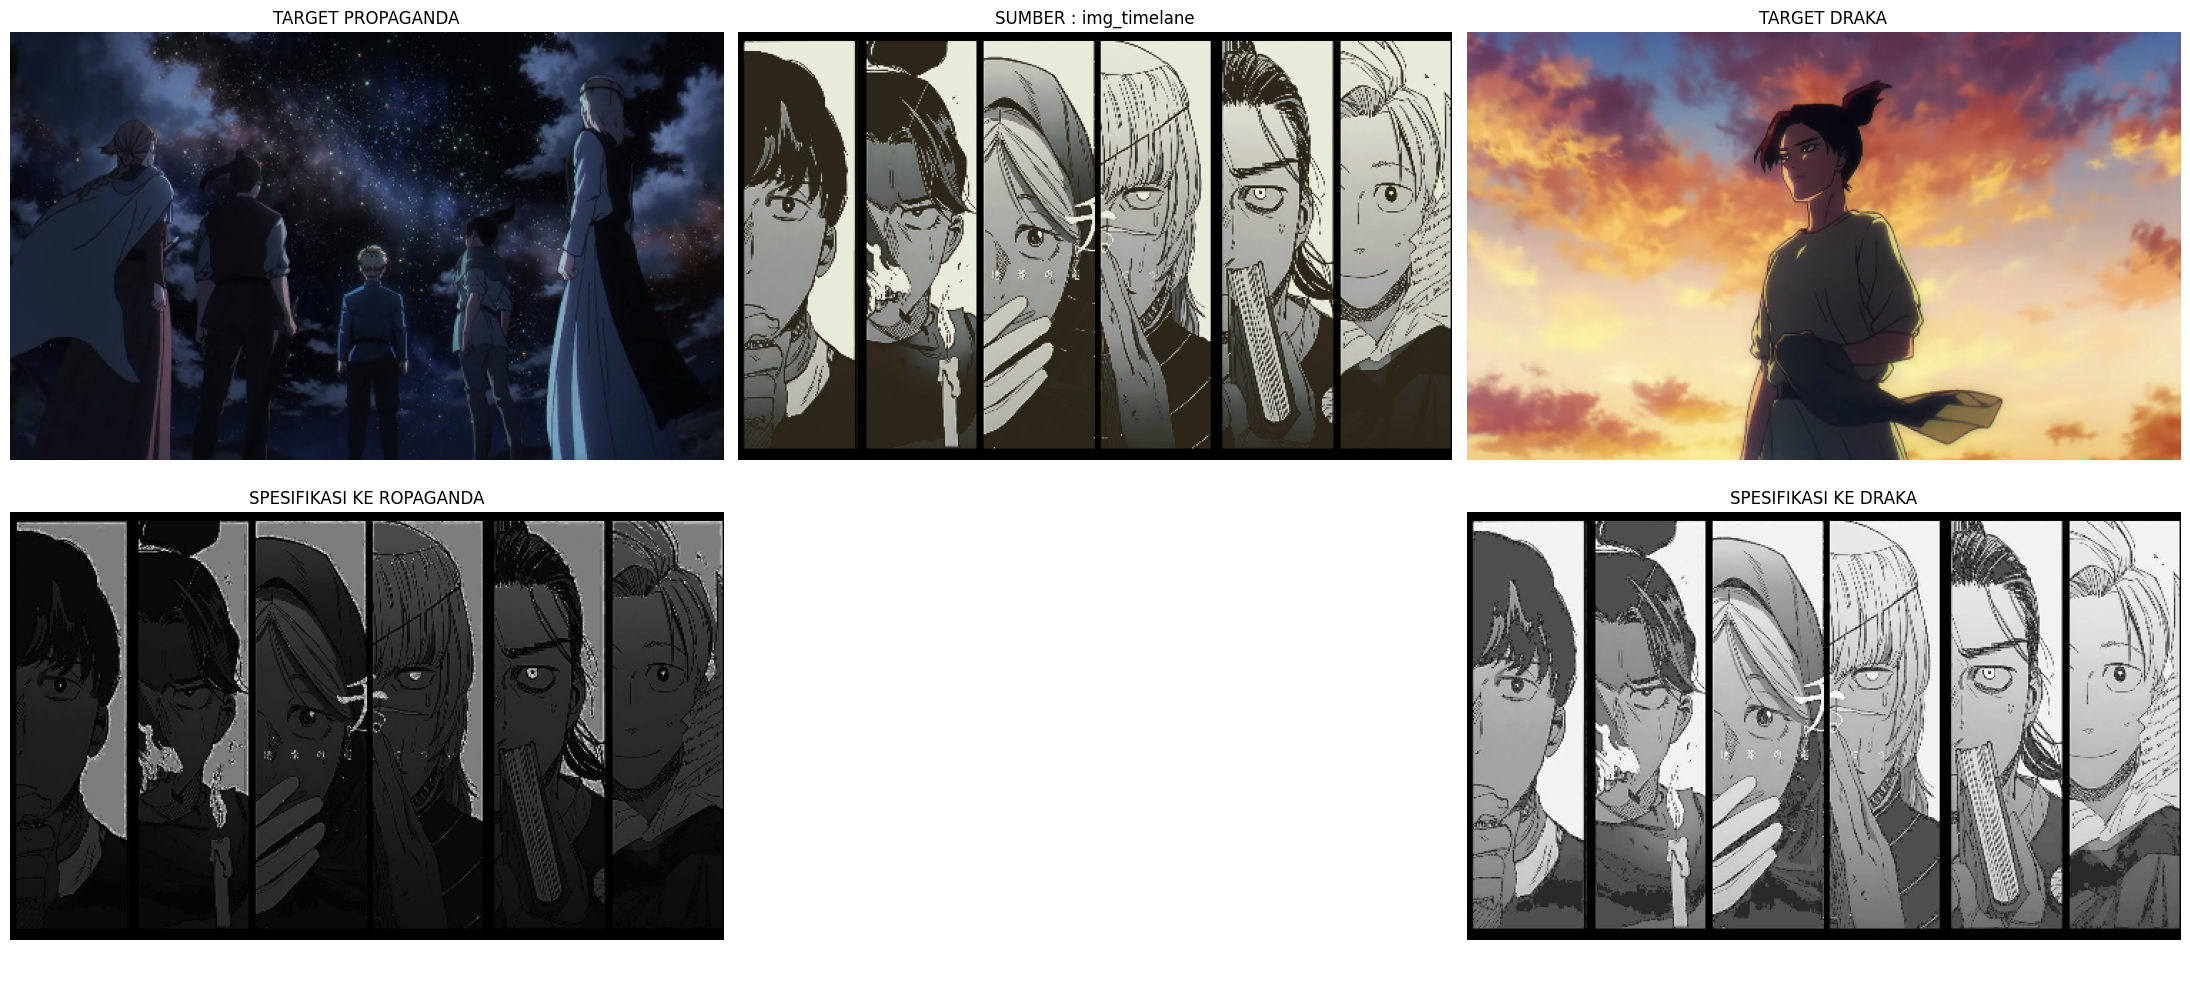

In [49]:
img_spec_propaganda = match_histogram_gray(img_timelane_gray, propaganda_gray)
img_spec_draka = match_histogram_gray(img_timelane_gray, draka_gray)

target_size = (500, 300)

propaganda_resized = cv.resize(propaganda, target_size)
draka_resized = cv.resize(draka, target_size)
img_timelane_resized = cv.resize(img_timelane, target_size)
img_spec_propaganda_resized = cv.resize(img_spec_propaganda, target_size)
img_spec_draka_resized = cv.resize(img_spec_draka, target_size)

fig, axs = plt.subplots(2, 3, figsize=(22, 10))

axs[0, 0].imshow(propaganda_resized)
axs[0, 0].axis('off')
axs[0, 0].set_title('TARGET PROPAGANDA')

axs[0, 1].imshow(img_timelane_resized)
axs[0, 1].axis('off')
axs[0, 1].set_title('SUMBER : img_timelane')

axs[0, 2].imshow(draka_resized)
axs[0, 2].axis('off')
axs[0, 2].set_title('TARGET DRAKA')

axs[1, 0].imshow(img_spec_propaganda_resized, cmap='gray')
axs[1, 0].axis('off')
axs[1, 0].set_title('SPESIFIKASI KE ROPAGANDA')

axs[1, 1].axis('off')

axs[1, 2].imshow(img_spec_draka_resized, cmap='gray')
axs[1, 2].axis('off')
axs[1, 2].set_title('SPESIFIKASI KE DRAKA')

plt.tight_layout()
plt.show()

4. HASIL ANALISIS

Pada hasil di atas, proses yang dilakukan adalah membandingkan histogram matching (penyesuaian distribusi intensitas pixel) dari gambar img_timelane terhadap dua gambar target, yaitu propaganda.jpg dan draka.jpg. Secara garis besar, langkah-langkahnya adalah sebagai berikut:

a. Persiapan Data:
Gambar propaganda.jpg, draka>jpg, dan img_timelane diubah menjadi grayscale (hitam putih) menggunakan cv.cvtColor(). Ini karena histogram matching pada kode ini hanya diterapkan untuk gambar grayscale, bukan gambar berwarna.

b. Histogram Matching:
Fungsi match_histogram_gray kemudian digunakan untuk mencocokkan distribusi intensitas pixel img_timelane supaya mengikuti distribusi pixel propaganda_gray dan draka_gray.
- Untuk img_spec_propaganda, sumber img_timelane_gray dicocokkan agar histogramnya menyerupai propaganda_gray.
- Untuk img_spec_draka, sumber img_timelane_gray dicocokkan agar histogramnya menyerupai draka_gray.

c. Visualisasi:
- Gambar asli (propaganda.jpg, img_timelane, dan draka.jpg) dan hasil spesifikasinya (img_spec_propaganda dan img_spec_draka) ditampilkan dalam grid 2 baris 3 kolom.
- Gambar hasil matching (img_spec_propaganda dan img_spec_draka) ditampilkan dalam mode grayscale.


KESIMPULAN HASIL:
- img_spec_propaganda terlihat menyesuaikan distribusi warna atau intensitasnya menjadi lebih mirip dengan propaganda.jpg.
Misalnya, jika propaganda cenderung lebih cerah atau lebih kontras pada bagian tertentu, maka img_spec_propaganda juga akan menyesuaikan intensitas pixelnya sehingga menyerupai distribusi cerah/gelap tersebut, meskipun bentuk visualnya masih mengikuti img_timelane.
- img_spec_draka pun demikian: meskipun bentuknya tetap berasal dari img_timelane, distribusi intensitas pixelnya berubah menyerupai gambar draka.jpg. Jika draka memiliki area gelap yang dominan atau pencahayaan yang berbeda, hasil pencocokannya juga akan menjadi lebih gelap atau sesuai distribusi draka.

MENGAPA HASILNYA BISA SEPERTI ITU :

Karena histogram matching tidak mengubah bentuk atau konten gambar sumber (img_timelane), melainkan hanya mengubah distribusi intensitas pixel supaya menyerupai distribusi gambar target (propaganda atau draka). Ini membuat gambar seolah "meminjam" karakter pencahayaan atau tonal dari target.


______________________________________

Script di bawah bertujuan untuk melakukan penggabungan sebagian area dari dua citra hasil pencocokan histogram, yaitu img_spec_draka dan img_spec_propaganda, menggunakan fungsi new_match_section dan apply_match_with_mask. Fungsi new_match_section membuat sebuah mask pada area tertentu dari gambar sumber, kemudian menggantikan area tersebut dengan gambar target menggunakan fungsi apply_match_with_mask. Pertama, final_spec_match dibuat dengan mencocokkan seluruh area tertentu dari img_spec_propaganda ke img_spec_draka, lalu split_spec_match dihasilkan dengan memperbarui beberapa area tambahan secara bertahap melalui pemanggilan new_match_section berkali-kali dengan koordinat yang berbeda. Akhirnya, kedua hasil (split_spec_match dan final_spec_match) ditampilkan berdampingan menggunakan matplotlib, dengan pewarnaan skala abu-abu (cmap="gray") dan tanpa menampilkan axis, sehingga perubahan antar kedua hasil tersebut bisa dilihat secara lebih jelas.

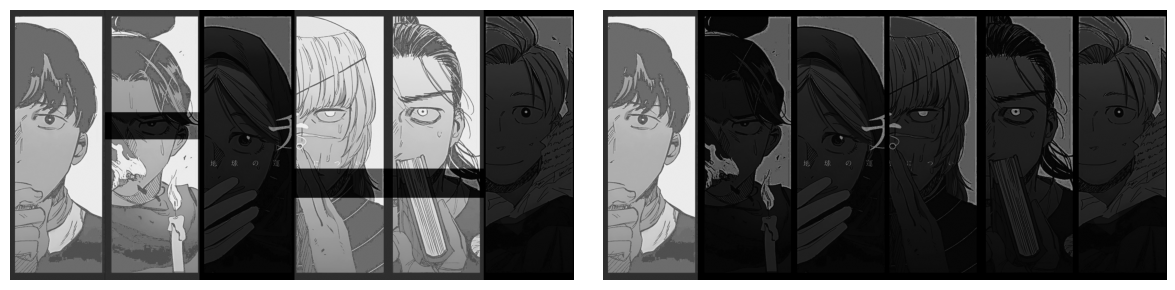

In [50]:
def new_match_section(match, source, a, b, x, y):
    mask = np.zeros_like(source, dtype=bool)
    mask[a:b, x:y] = True
    result = apply_match_with_mask(match, source, mask)
    return result

def apply_match_with_mask(match_img, source_img, mask):
    result = source_img.copy()
    result[mask] = match_img[mask]
    return result

final_spec_match = new_match_section(img_spec_draka, img_spec_propaganda, 0, 1294, 0, 454)
split_spec_match = new_match_section(img_spec_draka, final_spec_match, 0, 490, 455, 907)
split_spec_match = new_match_section(img_spec_draka, split_spec_match, 620, 1294, 455, 907)
split_spec_match = new_match_section(img_spec_draka, split_spec_match, 0, 760, 1362, 2268)
split_spec_match = new_match_section(img_spec_draka, split_spec_match, 900, 1294, 1362, 2268)

plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.imshow(split_spec_match, cmap="gray")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_spec_match, cmap="gray")
plt.axis('off')

plt.tight_layout()
plt.show()
